In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 300)
import warnings
warnings.filterwarnings('ignore')

获取具备预设相关系数的随机数序列

https://bigdata-s3.wmcloud.com/researchreport/cc/4ed6181eabb6a1959c90312042215349.pdf



<img style="float: left;" src="123.png" width="50%"> 


In [2]:
def corr_random(n,mean,cov):
    '''
    功能：获取具备预设相关系数的随机数序列  作为股票收益率时间序列
    输入：1.随机数长度n
          2.随机数均值mean
          3.协方差矩阵cov
    输出：随机数array 满足协方差矩阵
    '''
    # np.random.seed(0)
    num_samples = n
    mu = mean
    r = cov
    rng = np.random.default_rng()
    # 生成正态随机数序列
    y = rng.multivariate_normal(mu, r, num_samples,check_valid = 'raise',tol = 1e-8,method = 'cholesky')
    return y


# 输入一个给定的协方差矩阵

In [3]:
n = 10000
mean = np.array([0.0, 0.0, 0.0])
rcov = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])
#调用函数
rdata = corr_random(n,mean,rcov)

<AxesSubplot:>

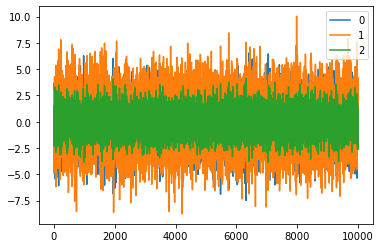

In [4]:
# 绘制符合rcov要求的随机数变化图
rdata = pd.DataFrame(rdata)
rdata.plot()

In [5]:
#检查cov是否与给定一致
temp = rdata.cov()
temp

,0,1,2
0,3.339343,-2.700612,-1.963702
1,-2.700612,5.466502,1.470935
2,-1.963702,1.470935,1.227653


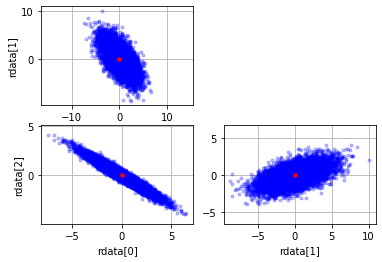

In [6]:
#观察生成的随机序列之间的散点图相关性
plt.subplot(2,2,1)
plt.plot(rdata.iloc[:,0], rdata.iloc[:,1], 'b.', alpha=0.25)
plt.plot(mean[0], mean[1], 'ro', ms=3.5)
plt.ylabel('rdata[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(rdata.iloc[:,0], rdata.iloc[:,2], 'b.', alpha=0.25)
plt.plot(mean[0], mean[2], 'ro', ms=3.5)
plt.xlabel('rdata[0]')
plt.ylabel('rdata[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(rdata.iloc[:,1], rdata.iloc[:,2], 'b.', alpha=0.25)
plt.plot(mean[1], mean[2], 'ro', ms=3.5)
plt.xlabel('rdata[1]')
plt.axis('equal')
plt.grid(True)

plt.show()

# 输入一个随机生成的半正定协方差矩阵

In [7]:
n = 100000
N = 10#资产个数
mean = np.zeros(N)#各股票日收益率均值均设为0

# 产生随机相关系数矩阵
def simLD(n,s=1,sp=0):
    '''功能：随机生成相关系数矩阵
       输入：n:矩阵阶数
             s:相关程度系数，越接近0.5越不相关（s是元素为负数的概率）
             sp：稀疏程度，越接近1越稀疏
       输出：相关系数矩阵A'''
    D = np.random.random((n, n))# 生成N阶随机矩阵D
    D = D*np.select([D>sp], [1])

    B = np.random.uniform(size=(n, n))
    R = np.random.random((n,n))*s

    C = (D / D.sum(0)) ** (1 / 2) * np.select([B<=R,s>R], [-1,1])# 将D变换为行元素平方和为一的矩阵C
    A = np.mat(C).T * np.mat(C)
    return A
rrho = simLD(N,0.5,0)



# 随机产生N个方差 值位于0-10之间？
rsigma_list = (np.random.randint(0,10,N) + np.random.random(N))
rsigma = np.diag(rsigma_list)

rcov = np.sqrt(np.matrix(rsigma)) @ np.matrix(rrho) @ np.sqrt(np.matrix(rsigma))
#判断产生的cov是否为半正定矩阵
def is_pos_def(A):
    if np.array_equal(A, A.T):
        try:
            np.linalg.cholesky(A)
            return '是半正定矩阵'
        except np.linalg.LinAlgError:
            return '不是半正定矩阵-1'
    else:
        if np.allclose (A, A.T, rtol = 1e-05 , atol = 1e-08 , equal_nan = False ):
            try:
                np.linalg.cholesky(A)
                return '是半正定矩阵'
            except np.linalg.LinAlgError:
                return '不是半正定矩阵-1'
        else:
            return '不是半正定矩阵-2'

In [8]:
print(is_pos_def(rcov))
print(is_pos_def(rrho))

是半正定矩阵
是半正定矩阵


<AxesSubplot:>

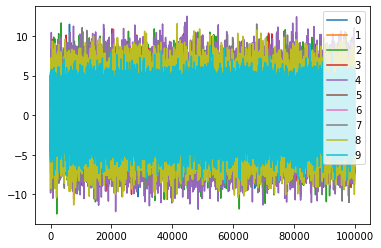

In [9]:
rdata = corr_random(n,mean,rcov)
# 绘制随机数变化图
rdata = pd.DataFrame(rdata)
rdata.plot()

In [10]:
#检查cov是否与给定一致????
temp = rdata.cov()
tempcorr = rdata.corr()
print('得到的随机数序列的cov')
temp

得到的随机数序列的cov


,0,1,2,3,4,5,6,7,8,9
0,4.977958,0.245068,3.922810,-1.092515,0.665012,0.212871,0.118423,3.418665,2.235652,0.898610
1,0.245068,1.260555,1.105955,1.432239,1.337163,0.537791,1.013345,1.770239,1.553394,-0.210792
2,3.922810,1.105955,7.711076,1.823772,5.103646,1.225824,2.700099,4.000737,5.966242,-0.119781
3,-1.092515,1.432239,1.823772,6.071648,3.891058,1.564859,3.567708,0.930831,3.153083,-1.092693
4,0.665012,1.337163,5.103646,3.891058,9.005221,0.835734,3.198926,-0.011040,2.513734,-0.529028
5,0.212871,0.537791,1.225824,1.564859,0.835734,0.815789,0.984511,0.841963,1.705843,0.087818
6,0.118423,1.013345,2.700099,3.567708,3.198926,0.984511,2.850296,1.530128,3.359062,-0.248314
7,3.418665,1.770239,4.000737,0.930831,-0.011040,0.841963,1.530128,6.526337,4.882898,-1.209982
8,2.235652,1.553394,5.966242,3.153083,2.513734,1.705843,3.359062,4.882898,7.277449,-0.047445
9,0.898610,-0.210792,-0.119781,-1.092693,-0.529028,0.087818,-0.248314,-1.209982,-0.047445,4.065513


In [11]:
print('输入函数的预定cov')
pd.DataFrame(rcov)

输入函数的预定cov


,0,1,2,3,4,5,6,7,8,9
0,4.979304,0.243077,3.928133,-1.094473,0.670081,0.214112,0.117819,3.415216,2.233449,0.897645
1,0.243077,1.262485,1.102070,1.431696,1.330299,0.539174,1.014188,1.775246,1.558489,-0.206756
2,3.928133,1.102070,7.707878,1.822886,5.095622,1.225121,2.700766,4.001207,5.966717,-0.115556
3,-1.094473,1.431696,1.822886,6.060177,3.888328,1.561960,3.562739,0.927555,3.153623,-1.086605
4,0.670081,1.330299,5.095622,3.888328,8.973482,0.838929,3.195859,-0.010749,2.521248,-0.515640
5,0.214112,0.539174,1.225121,1.561960,0.838929,0.814672,0.983908,0.841659,1.704548,0.092765
6,0.117819,1.014188,2.700766,3.562739,3.195859,0.983908,2.849072,1.530616,3.364299,-0.242359
7,3.415216,1.775246,4.001207,0.927555,-0.010749,0.841659,1.530616,6.537430,4.888204,-1.216415
8,2.233449,1.558489,5.966717,3.153623,2.521248,1.704548,3.364299,4.888204,7.284419,-0.041920
9,0.897645,-0.206756,-0.115556,-1.086605,-0.515640,0.092765,-0.242359,-1.216415,-0.041920,4.084956


# 输入一个非半正定的协方差矩阵

In [12]:
#生成一个非半正定的相关系数矩阵
#产生N*N的相关系数矩阵 数据位于-0.9 0.9 之间
rrho= np.random.random((N,N)) *(np.random.choice([-0.9, 0.9],(N,N)))
row, col = np.diag_indices_from(rrho) 
rrho[row, col] = [1] * len(rrho)#对主对角线进行赋值
for i in range(N):#对下三角位置进行赋值
    for j in range(i,N):
        rrho[i,j] = rrho[j,i]

In [13]:
#判断产生的corr是否为半正定矩阵   -1代表无法进行cholesky分解
print(is_pos_def(rrho))

不是半正定矩阵-1


In [14]:
# 随机产生N个方差 值位于0-10之间？
rsigma_list = (np.random.randint(0,10,N) + np.random.random(N))
rsigma = np.diag(rsigma_list)
rcov = np.sqrt(np.matrix(rsigma)) @ np.matrix(rrho) @ np.sqrt(np.matrix(rsigma))
#判断产生的cov是否为半正定矩阵
print(is_pos_def(rcov))

不是半正定矩阵-1


协方差阵的目的就是用来求一组具备给定协方差关系/相关关系的随机数序列


如果协方差阵非正定？那么不能使用cholesky分解，从而不能得到一个下三角矩阵L


**<font color = red>使用cvxpy计算一个距离给定corr最近的（F范数）&符合半正定条件的新相关系数矩阵</font>**使其可以进行cholesky分解

https://www.cvxpy.org/api_reference/cvxpy.constraints.html

In [31]:
import cvxpy as cvx

n = N
m = 0.01 #设定求出来的corr的特征值的最小值
origin = rrho

print('修改前的相关系数矩阵为：')
print(is_pos_def(origin))
pd.DataFrame(origin)

修改前的相关系数矩阵为：
不是半正定矩阵-1


,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.330222,-0.674385,-0.880023,0.799572,0.753785,0.363748,0.087364,0.252710,-0.203860
1,0.330222,1.000000,-0.355627,0.352257,-0.222857,0.852917,0.721738,0.809903,-0.344047,0.477615
2,-0.674385,-0.355627,1.000000,-0.158694,0.641760,-0.843698,0.755279,-0.325076,0.458819,0.122816
3,-0.880023,0.352257,-0.158694,1.000000,0.436399,-0.514869,-0.788007,-0.797272,-0.715325,0.370354
4,0.799572,-0.222857,0.641760,0.436399,1.000000,0.478484,-0.581416,-0.815658,-0.509689,-0.630420
5,0.753785,0.852917,-0.843698,-0.514869,0.478484,1.000000,0.211748,-0.665221,0.298192,0.007878
6,0.363748,0.721738,0.755279,-0.788007,-0.581416,0.211748,1.000000,-0.894719,-0.122632,-0.803941
7,0.087364,0.809903,-0.325076,-0.797272,-0.815658,-0.665221,-0.894719,1.000000,0.674561,0.490881
8,0.252710,-0.344047,0.458819,-0.715325,-0.509689,0.298192,-0.122632,0.674561,1.000000,0.550235
9,-0.203860,0.477615,0.122816,0.370354,-0.630420,0.007878,-0.803941,0.490881,0.550235,1.000000


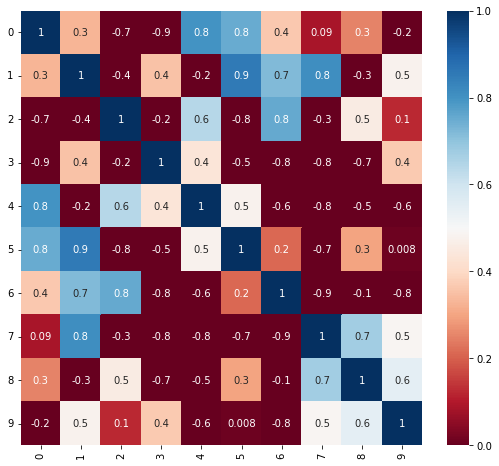

In [32]:
#绘制相关系数热力图
import seaborn as sns
f, ax = plt.subplots(figsize=(9,8))
ax = sns.heatmap(origin,cmap = 'RdBu',ax=ax,vmin=0, vmax=1,annot=True,fmt ='0.1g')

#设置坐标字体方向
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [18]:
print('修改前的相关系数矩阵特征值分解如下：')
l,S = np.linalg.eig(origin)
print(l)

修改前的相关系数矩阵特征值分解如下：
[-1.61907468 -1.4249221   3.29557042  3.37013574 -0.23887664  0.02105936
  2.53753592  1.88292469  0.88619208  1.28945521]


In [33]:
x = cvx.Variable((n,n))#,symmetric=True) 
objective = cvx.Minimize(cvx.norm(x - origin,'fro')) 
constraints = [cvx.PSD(x-m*np.eye(n,n)),cvx.diag(x)==1,x==x.T] 
prob = cvx.Problem(objective, constraints) 
prob.solve() 

change_rrho = x.value

print('修改后的相关系数矩阵为：')
print(is_pos_def(change_rrho))
pd.DataFrame(change_rrho)

修改后的相关系数矩阵为：
是半正定矩阵


,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.267668,-0.394048,-0.591887,0.368677,0.791066,0.201012,0.019652,0.193003,-0.292651
1,0.267668,1.000000,-0.406059,-0.001333,-0.270793,0.515813,0.265001,0.258951,-0.143533,0.320460
2,-0.394048,-0.406059,1.000000,-0.029030,0.130115,-0.492873,0.344372,-0.291734,0.219604,-0.079650
3,-0.591887,-0.001333,-0.029030,1.000000,0.269357,-0.265524,-0.463697,-0.349299,-0.647286,0.246929
4,0.368677,-0.270793,0.130115,0.269357,1.000000,0.290847,-0.096942,-0.672858,-0.355706,-0.403062
5,0.791066,0.515813,-0.492873,-0.265524,0.290847,1.000000,0.244630,-0.204035,0.031517,-0.070891
6,0.201012,0.265001,0.344372,-0.463697,-0.096942,0.244630,1.000000,-0.347371,-0.055481,-0.521744
7,0.019652,0.258951,-0.291734,-0.349299,-0.672858,-0.204035,-0.347371,1.000000,0.533433,0.565483
8,0.193003,-0.143533,0.219604,-0.647286,-0.355706,0.031517,-0.055481,0.533433,1.000000,0.443383
9,-0.292651,0.320460,-0.079650,0.246929,-0.403062,-0.070891,-0.521744,0.565483,0.443383,1.000000


In [20]:
print('修改后的相关系数矩阵特征值分解如下：')
l1,S1 = np.linalg.eig(change_rrho)
print(l1)

修改后的相关系数矩阵特征值分解如下：
[3.29557397 3.37013936 2.53753865 1.88292671 0.88619303 1.28945659
 0.02105937 0.00999823 0.00998981 0.00998843]


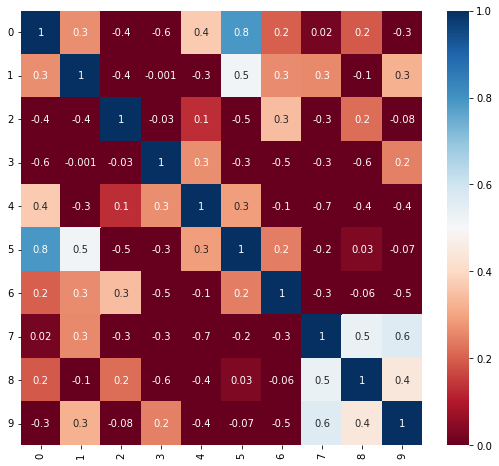

In [25]:
f, ax = plt.subplots(figsize=(9,8))
ax = sns.heatmap(change_rrho,cmap = 'RdBu',ax=ax,vmin=0, vmax=1,annot=True,fmt ='0.1g')

#设置坐标字体方向
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()